In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
red_wine_df = pd.read_csv('data-files/winequality-red.csv', sep=';', encoding='utf-8')

In [3]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
red_wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
red_wine_df['quality'].map(lambda q: 'low' if q < 5
                                           else 'medium' if q < 7
                                                         else 'high').value_counts()

medium    1319
high       217
low         63
Name: quality, dtype: int64

In [11]:
red_wine_df['quality_label'] = red_wine_df['quality'].map(lambda q: 'low' if q < 5
                                                                          else 'medium' if q < 7
                                                                                        else 'high')
red_wine_df.drop('quality', axis=1, inplace=True)

In [12]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium


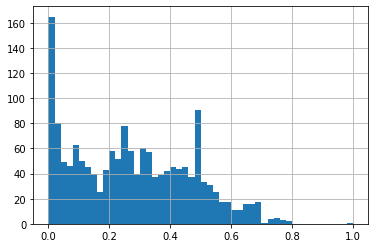

In [17]:
red_wine_df['citric acid'].hist(bins=50)
plt.show()

In [18]:
red_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [19]:
X = red_wine_df.drop('quality_label', axis=1)
y = red_wine_df['quality_label']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2, stratify=y)

In [27]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

In [28]:
print( X_train_scaled.min(axis=0), X_train_scaled.max(axis=0) )
print( X_test_scaled.min(axis=0), X_test_scaled.max(axis=0) )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.06422018  0.04109589  0.          0.02054795  0.          0.
  0.00367647  0.04185022  0.09448819 -0.02453988  0.        ] [1.03669725 0.82876712 0.76       0.69178082 0.67278798 0.91549296
 1.04044118 0.96402349 0.76377953 0.96932515 1.16071429]


In [29]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)
print( svc.score(X_train, y_train) )
print( svc.score(X_test, y_test))

0.35887412040656763
0.3125


In [30]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train_scaled, y_train)
print( svc.score(X_train_scaled, y_train) )
print( svc.score(X_test_scaled, y_test))

0.8389366692728695
0.834375
